# Multivariable_regression 
Crime in the united states 2013

[Crime in the U.S. 2013](https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/table-8/table-8-state-cuts/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls)


In [20]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
import seaborn as sns

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [31]:
df = pd.read_excel('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls', skiprows=4)

In [32]:
df[df['Population'] > 8000000]

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
216,New York,8396126.000,52384.000,335.000,nan,1112.000,19170.000,31767.000,141971.000,16606.000,117931.000,7434.000,nan


In [33]:
df = df[['Population','Murder and\nnonnegligent\nmanslaughter', 'Robbery', 'Property\ncrime']]


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 4 columns):
Population                              348 non-null float64
Murder and
nonnegligent
manslaughter    348 non-null float64
Robbery                                 348 non-null float64
Property
crime                          348 non-null float64
dtypes: float64(4)
memory usage: 11.0 KB


In [35]:
df = df.dropna()

In [36]:
df.head()

,Population,Murder and nonnegligent manslaughter,Robbery,Property crime
0,1861.000,0.000,0.000,12.000
1,2577.000,0.000,0.000,24.000
2,2846.000,0.000,0.000,16.000
3,97956.000,8.000,227.000,4090.000
4,6388.000,0.000,4.000,223.000


In [37]:
df.describe()

,Population,Murder and nonnegligent manslaughter,Robbery,Property crime
count,348.000,348.000,348.000,348.000
mean,40037.632,1.566,72.902,792.606
std,450037.368,18.304,1031.033,7659.725
min,526.000,0.000,0.000,0.000
25%,3003.000,0.000,0.000,40.500
50%,7233.500,0.000,1.000,112.500
75%,18427.500,0.000,5.000,341.000
max,8396126.000,335.000,19170.000,141971.000


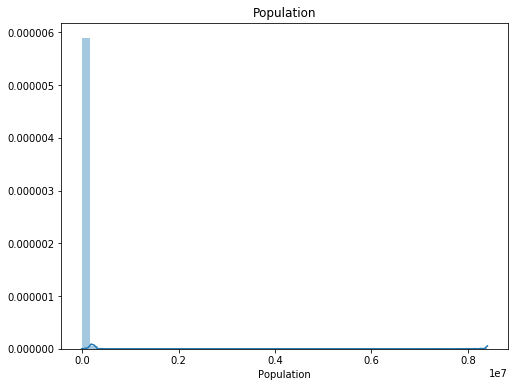

In [30]:
plt.figure(figsize=(8,6))

sns.distplot(df['Population'])
plt.title('Population')

plt.show()

In [39]:
features = pd.DataFrame()
features['population'] = df['Population']
features['population_sq'] = df['Population']**2

In [43]:
features['murder'] = np.where(df['Murder and\nnonnegligent\nmanslaughter']>0, 1, 0)

In [44]:
features['robbery'] = np.where(df['Robbery']>0, 1, 0)

In [46]:
features.describe()

,population,population_sq,murder,robbery
count,348.000,348.000,348.000,348.000
mean,40037.632,203554650960.236,0.141,0.601
std,450037.368,3778875542708.130,0.348,0.490
min,526.000,276676.000,0.000,0.000
25%,3003.000,9018117.000,0.000,0.000
50%,7233.500,52325684.500,0.000,1.000
75%,18427.500,339753567.000,0.000,1.000
max,8396126.000,70494931807876.000,1.000,1.000
